In [263]:
from datetime import date
import statistics
from collections import Counter

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import table 
import matplotlib.pyplot as plt
import matplotlib.table as table
import seaborn as sns
from scipy import stats

In [20]:
repos = pd.read_csv("../variable_collection/output/repositories_filtered_2021-05-20.csv")
how_fair_is = pd.read_csv("../variable_collection/output/repositories_howfairis.csv")
languages = pd.read_csv("../variable_collection/output/languages_2021-05-22.csv")
contributors = pd.read_csv("../variable_collection/output/contributors_2021-06-11.csv")
topics = pd.read_csv("../variable_collection/output/topics_2021-06-04.csv")
export_path_graphs = "../graphs/"

## Filtering for research groups or private users only

In [21]:
users = pd.read_excel("unique_users_annotated.xlsx")

In [22]:
def add_research_group_filter(dataset):
    user_is_research_group = []
    for row in dataset.iterrows():
        try:
            owner = row[1]['owner']
        except:
            owner = row[1]['html_url_repository'].split('/')[-2]
            
            
      
        row_users = users.loc[users['github_user_id'] == owner]
        if len(row_users['is_research_group']) == 0:
            user_is_research_group.append(False)
        for i in row_users['is_research_group']:
            if i == 1:
                user_is_research_group.append(True)
                break
            else:
                user_is_research_group.append(False)
                break
                    
    return user_is_research_group
    

In [24]:
repos['is_research_group'] = add_research_group_filter(repos)
contributors['is_research_group'] = add_research_group_filter(contributors)
topics['is_research_group'] = add_research_group_filter(topics)
languages['is_research_group'] = add_research_group_filter(languages)
how_fair_is['is_research_group'] = add_research_group_filter(how_fair_is)

## Run to filter for only private users

In [11]:
repos = repos[~repos['is_research_group']]
contributors = contributors[~contributors['is_research_group']]
topics = topics[~topics['is_research_group']]
languages = languages[~languages['is_research_group']]
how_fair_is = how_fair_is[~how_fair_is['is_research_group']]
export_path_graphs = '../private_user_graphs/'

## Run to filter for only research groups

In [12]:
repos = repos[repos['is_research_group']]
contributors = contributors[contributors['is_research_group']]
topics = topics[topics['is_research_group']]
languages = languages[languages['is_research_group']]
how_fair_is = how_fair_is[how_fair_is['is_research_group']]
export_path_graphs = '../research_group_graphs/'

## Datasets

Using the github API and the Howfairis software, we collected data on the repositories, their FAIRness, the languages used in the repository, the amount of contributors for each repository and the topics mentoined in each repository. 

The Howfairis software gives  boolean value on five measures of FAIRness for each repository. These five measures consist of having a repository (which is always True for our dataset), having a license, being available in a registry, allowing citation of the software and following the FAIR software quality checklist. Below, the first five rows of the datasets are displayed. 

In [25]:
repos

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,permissions,score,is_research_group
0,307429416,MDEwOlJlcG9zaXRvcnkzMDc0Mjk0MTY=,fastlogitME,M-thieu/fastlogitME,False,M-thieu,https://github.com/M-thieu/fastlogitME,Fast but Basic Marginal Effects for Logit Mode...,False,https://api.github.com/repos/M-thieu/fastlogitME,...,0,NaN,[],0,0,0,master,NaN,1.0,False
1,73220408,MDEwOlJlcG9zaXRvcnk3MzIyMDQwOA==,Seattle-Feature-Service,bricker0/Seattle-Feature-Service,False,bricker0,https://github.com/bricker0/Seattle-Feature-Se...,Here I explain how to call Seattle Open Data E...,False,https://api.github.com/repos/bricker0/Seattle-...,...,0,NaN,[],0,0,2,master,NaN,1.0,False
2,259872452,MDEwOlJlcG9zaXRvcnkyNTk4NzI0NTI=,choropleth_map,bricker0/choropleth_map,False,bricker0,https://github.com/bricker0/choropleth_map,How to make a choropleth map using SDG indicat...,False,https://api.github.com/repos/bricker0/chorople...,...,0,MIT License,[],0,0,1,master,NaN,1.0,False
3,112259672,MDEwOlJlcG9zaXRvcnkxMTIyNTk2NzI=,Live_Earthquake_Feed,bricker0/Live_Earthquake_Feed,False,bricker0,https://github.com/bricker0/Live_Earthquake_Feed,Want to make one of those snazzy live Earthqua...,False,https://api.github.com/repos/bricker0/Live_Ear...,...,0,NaN,[],0,0,0,master,NaN,1.0,False
4,51859197,MDEwOlJlcG9zaXRvcnk1MTg1OTE5Nw==,MyLocation,bricker0/MyLocation,False,bricker0,https://github.com/bricker0/MyLocation,Lab 3,False,https://api.github.com/repos/bricker0/MyLocation,...,0,NaN,[],0,0,0,master,NaN,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,42170154,MDEwOlJlcG9zaXRvcnk0MjE3MDE1NA==,brokenstick,growthcharts/brokenstick,False,growthcharts,https://github.com/growthcharts/brokenstick,Broken Stick Model for Irregular Longitudinal ...,False,https://api.github.com/repos/growthcharts/brok...,...,0,Other,"['longitudinal-data', 'linear-mixed-models', '...",3,0,4,master,NaN,1.0,True
1352,360871593,MDEwOlJlcG9zaXRvcnkzNjA4NzE1OTM=,jamesdemodata,growthcharts/jamesdemodata,False,growthcharts,https://github.com/growthcharts/jamesdemodata,Demo Data for JAMES,False,https://api.github.com/repos/growthcharts/jame...,...,0,GNU Affero General Public License v3.0,[],0,0,0,master,NaN,1.0,True
1353,337202059,MDEwOlJlcG9zaXRvcnkzMzcyMDIwNTk=,centile,growthcharts/centile,False,growthcharts,https://github.com/growthcharts/centile,"Translate Measurements, Z-Scores and Centiles ...",False,https://api.github.com/repos/growthcharts/centile,...,0,Other,"['box-cox', 'rif', 'james-server', 'centile']",0,0,0,master,NaN,1.0,True
1354,347425843,MDEwOlJlcG9zaXRvcnkzNDc0MjU4NDM=,bdsreader,growthcharts/bdsreader,False,growthcharts,https://github.com/growthcharts/bdsreader,Read Data from the Basisdataset Jeugdgezondhei...,False,https://api.github.com/repos/growthcharts/bdsr...,...,0,Other,"['json', 'james-server', 'basisdataset-jgz']",0,0,0,master,NaN,1.0,True


In [26]:
how_fair_is

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,watchers,default_branch,permissions,score,howfairis_repository,howfairis_license,howfairis_registry,howfairis_citation,howfairis_checklist,is_research_group
0,307429416,MDEwOlJlcG9zaXRvcnkzMDc0Mjk0MTY=,fastlogitME,M-thieu/fastlogitME,False,M-thieu,https://github.com/M-thieu/fastlogitME,Fast but Basic Marginal Effects for Logit Mode...,False,https://api.github.com/repos/M-thieu/fastlogitME,...,0,master,NaN,1.0,True,False,False,False,False,False
1,73220408,MDEwOlJlcG9zaXRvcnk3MzIyMDQwOA==,Seattle-Feature-Service,bricker0/Seattle-Feature-Service,False,bricker0,https://github.com/bricker0/Seattle-Feature-Se...,Here I explain how to call Seattle Open Data E...,False,https://api.github.com/repos/bricker0/Seattle-...,...,2,master,NaN,1.0,True,False,False,False,False,False
2,259872452,MDEwOlJlcG9zaXRvcnkyNTk4NzI0NTI=,choropleth_map,bricker0/choropleth_map,False,bricker0,https://github.com/bricker0/choropleth_map,How to make a choropleth map using SDG indicat...,False,https://api.github.com/repos/bricker0/chorople...,...,1,master,NaN,1.0,True,True,False,False,False,False
3,112259672,MDEwOlJlcG9zaXRvcnkxMTIyNTk2NzI=,Live_Earthquake_Feed,bricker0/Live_Earthquake_Feed,False,bricker0,https://github.com/bricker0/Live_Earthquake_Feed,Want to make one of those snazzy live Earthqua...,False,https://api.github.com/repos/bricker0/Live_Ear...,...,0,master,NaN,1.0,True,False,False,False,False,False
4,51859197,MDEwOlJlcG9zaXRvcnk1MTg1OTE5Nw==,MyLocation,bricker0/MyLocation,False,bricker0,https://github.com/bricker0/MyLocation,Lab 3,False,https://api.github.com/repos/bricker0/MyLocation,...,0,master,NaN,1.0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,42170154,MDEwOlJlcG9zaXRvcnk0MjE3MDE1NA==,brokenstick,growthcharts/brokenstick,False,growthcharts,https://github.com/growthcharts/brokenstick,Broken Stick Model for Irregular Longitudinal ...,False,https://api.github.com/repos/growthcharts/brok...,...,4,master,NaN,1.0,True,True,True,False,False,True
1352,360871593,MDEwOlJlcG9zaXRvcnkzNjA4NzE1OTM=,jamesdemodata,growthcharts/jamesdemodata,False,growthcharts,https://github.com/growthcharts/jamesdemodata,Demo Data for JAMES,False,https://api.github.com/repos/growthcharts/jame...,...,0,master,NaN,1.0,True,True,False,False,False,True
1353,337202059,MDEwOlJlcG9zaXRvcnkzMzcyMDIwNTk=,centile,growthcharts/centile,False,growthcharts,https://github.com/growthcharts/centile,"Translate Measurements, Z-Scores and Centiles ...",False,https://api.github.com/repos/growthcharts/centile,...,0,master,NaN,1.0,True,True,True,False,False,True
1354,347425843,MDEwOlJlcG9zaXRvcnkzNDc0MjU4NDM=,bdsreader,growthcharts/bdsreader,False,growthcharts,https://github.com/growthcharts/bdsreader,Read Data from the Basisdataset Jeugdgezondhei...,False,https://api.github.com/repos/growthcharts/bdsr...,...,0,master,NaN,1.0,True,True,False,False,False,True


In [27]:
languages

,html_url_repository,language,num_chars,is_research_group
0,https://github.com/M-thieu/fastlogitME,R,9917,False
1,https://github.com/bricker0/Seattle-Feature-Se...,HTML,7296,False
2,https://github.com/bricker0/MyLocation,Swift,22906,False
3,https://github.com/bricker0/Leaflet_2017,HTML,5028,False
4,https://github.com/bricker0/BasicWebsite,CSS,922,False
...,...,...,...,...
2779,https://github.com/gjlbeckers-uu/aglcheck,HTML,1242261,False
2780,https://github.com/gjlbeckers-uu/aglcheck,Jupyter Notebook,643501,False
2781,https://github.com/gjlbeckers-uu/aglcheck,Python,128191,False
2782,https://github.com/gjlbeckers-uu/aglcheck,Batchfile,50,False


In [28]:
contributors

,html_url_repository,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,starred_url,subscriptions_url,organizations_url,repos_url,events_url,received_events_url,type,site_admin,contributions,is_research_group
0,https://github.com/M-thieu/fastlogitME,M-thieu,20308204,MDQ6VXNlcjIwMzA4MjA0,https://avatars.githubusercontent.com/u/203082...,NaN,https://api.github.com/users/M-thieu,https://github.com/M-thieu,https://api.github.com/users/M-thieu/followers,https://api.github.com/users/M-thieu/following...,...,https://api.github.com/users/M-thieu/starred{/...,https://api.github.com/users/M-thieu/subscript...,https://api.github.com/users/M-thieu/orgs,https://api.github.com/users/M-thieu/repos,https://api.github.com/users/M-thieu/events{/p...,https://api.github.com/users/M-thieu/received_...,User,False,3,False
1,https://github.com/bricker0/Seattle-Feature-Se...,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,15,False
2,https://github.com/bricker0/choropleth_map,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,49,False
3,https://github.com/bricker0/Live_Earthquake_Feed,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,1,False
4,https://github.com/bricker0/MyLocation,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,https://github.com/growthcharts/brokenstick,stefvanbuuren,3919919,MDQ6VXNlcjM5MTk5MTk=,https://avatars.githubusercontent.com/u/391991...,NaN,https://api.github.com/users/stefvanbuuren,https://github.com/stefvanbuuren,https://api.github.com/users/stefvanbuuren/fol...,https://api.github.com/users/stefvanbuuren/fol...,...,https://api.github.com/users/stefvanbuuren/sta...,https://api.github.com/users/stefvanbuuren/sub...,https://api.github.com/users/stefvanbuuren/orgs,https://api.github.com/users/stefvanbuuren/repos,https://api.github.com/users/stefvanbuuren/eve...,https://api.github.com/users/stefvanbuu

In [29]:
topics

,html_url_repository,topic,is_research_group
0,https://github.com/cjvanlissa/COVID19_metadata,ncov,False
1,https://github.com/cjvanlissa/COVID19_metadata,coronavirus,False
2,https://github.com/cjvanlissa/COVID19_metadata,covid,False
3,https://github.com/cjvanlissa/COVID19_metadata,sars-cov-2,False
4,https://github.com/UUDigitalHumanitieslab/texc...,python,True
...,...,...,...
1203,https://github.com/growthcharts/centile,james-server,True
1204,https://github.com/growthcharts/centile,centile,True
1205,https://github.com/growthcharts/bdsreader,json,True
1206,https://github.com/growthcharts/bdsreader,james-server,True


In [30]:
print("The repository data from Github contains the following columns:")
print(repos.columns)

The repository data from Github contains the following columns:
Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'forks_url', 'keys_url',
       'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url',
       'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url',
       'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url',
       'languages_url', 'stargazers_url', 'contributors_url',
       'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url',
       'comments_url', 'issue_comment_url', 'contents_url', 'compare_url',
       'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url',
       'milestones_url', 'notifications_url', 'labels_url', 'releases_url',
       'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url',
       'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'has_i

## Different licenses 

A license is important because it shows that people have permission to use and modify your code. In our dataset,the most common one is MIT license, followed by GNU General Public license.  The plot below shows the value count of different licenses. 


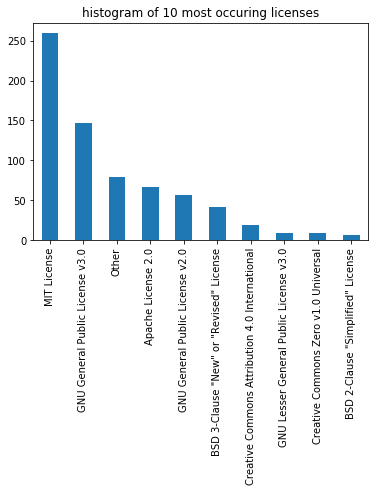

In [31]:
#first 10 licences
repos["license"].value_counts().head(10).plot(kind='bar', title='histogram of 10 most occuring licenses')
plt.savefig(export_path_graphs + "licenses_first10.png" ,bbox_inches="tight")

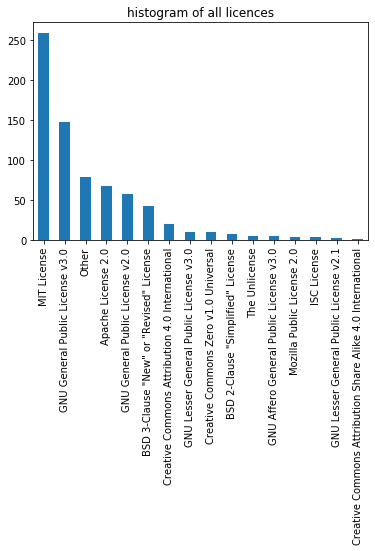

In [32]:
#all licences
repos["license"].value_counts().plot(kind='bar', title = 'histogram of all licences')
plt.savefig(export_path_graphs + "licenses_all.png" ,bbox_inches="tight")

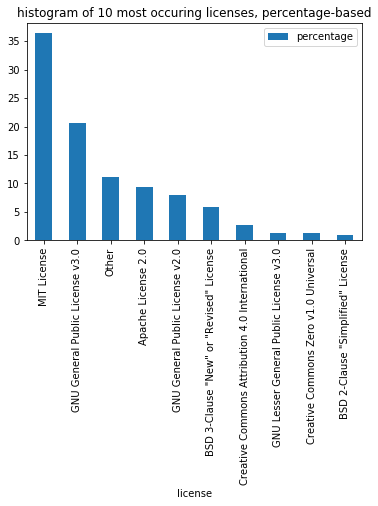

In [140]:
value_count_licenses  = repos["license"].value_counts().head(10)
percentage_count_licences = [[license, value_count/repos["license"].value_counts().sum()*100] for value_count,license in zip(value_count_licenses,value_count_licenses.keys())]
percentage_pd = pd.DataFrame(percentage_count_licences, columns = ['license','percentage'])
percentage_pd  = percentage_pd.set_index('license')
percentage_pd.plot(kind='bar', title='histogram of 10 most occuring licenses, percentage-based')
plt.savefig(export_path_graphs + "licenses_percentages.png" ,bbox_inches="tight")


Below, the propotion of licenses compared to the total is shown, with their absolute count shown below that. . 

In [33]:

for key,i in zip(repos["license"].value_counts().keys(), repos["license"].value_counts()):
    print(key + '{}: {:.3f}'.format(key, i/sum(repos["license"].value_counts())))
    #print(i/sum(repos["license"].value_counts()))


MIT LicenseMIT License: 0.364
GNU General Public License v3.0GNU General Public License v3.0: 0.206
OtherOther: 0.111
Apache License 2.0Apache License 2.0: 0.094
GNU General Public License v2.0GNU General Public License v2.0: 0.080
BSD 3-Clause "New" or "Revised" LicenseBSD 3-Clause "New" or "Revised" License: 0.059
Creative Commons Attribution 4.0 InternationalCreative Commons Attribution 4.0 International: 0.027
GNU Lesser General Public License v3.0GNU Lesser General Public License v3.0: 0.013
Creative Commons Zero v1.0 UniversalCreative Commons Zero v1.0 Universal: 0.013
BSD 2-Clause "Simplified" LicenseBSD 2-Clause "Simplified" License: 0.010
The UnlicenseThe Unlicense: 0.006
GNU Affero General Public License v3.0GNU Affero General Public License v3.0: 0.006
Mozilla Public License 2.0Mozilla Public License 2.0: 0.004
ISC LicenseISC License: 0.004
GNU Lesser General Public License v2.1GNU Lesser General Public License v2.1: 0.003
Creative Commons Attribution Share Alike 4.0 Interna

In [35]:
repos["license"].value_counts().to_excel('license_names.xlsx')


In [36]:
percentage_license = int(repos["license"].isna().value_counts()[1]/len(repos)* 100)
print("{} % of repositories have any kind of license on their page ".format(percentage_license))

47 % of repositories have any kind of license on their page 


## Languages

The programming language that is used in the repository gives information on the type of project the repository is. data analysis is mostly done in R and Python, though Python is used for other purposes as well. 

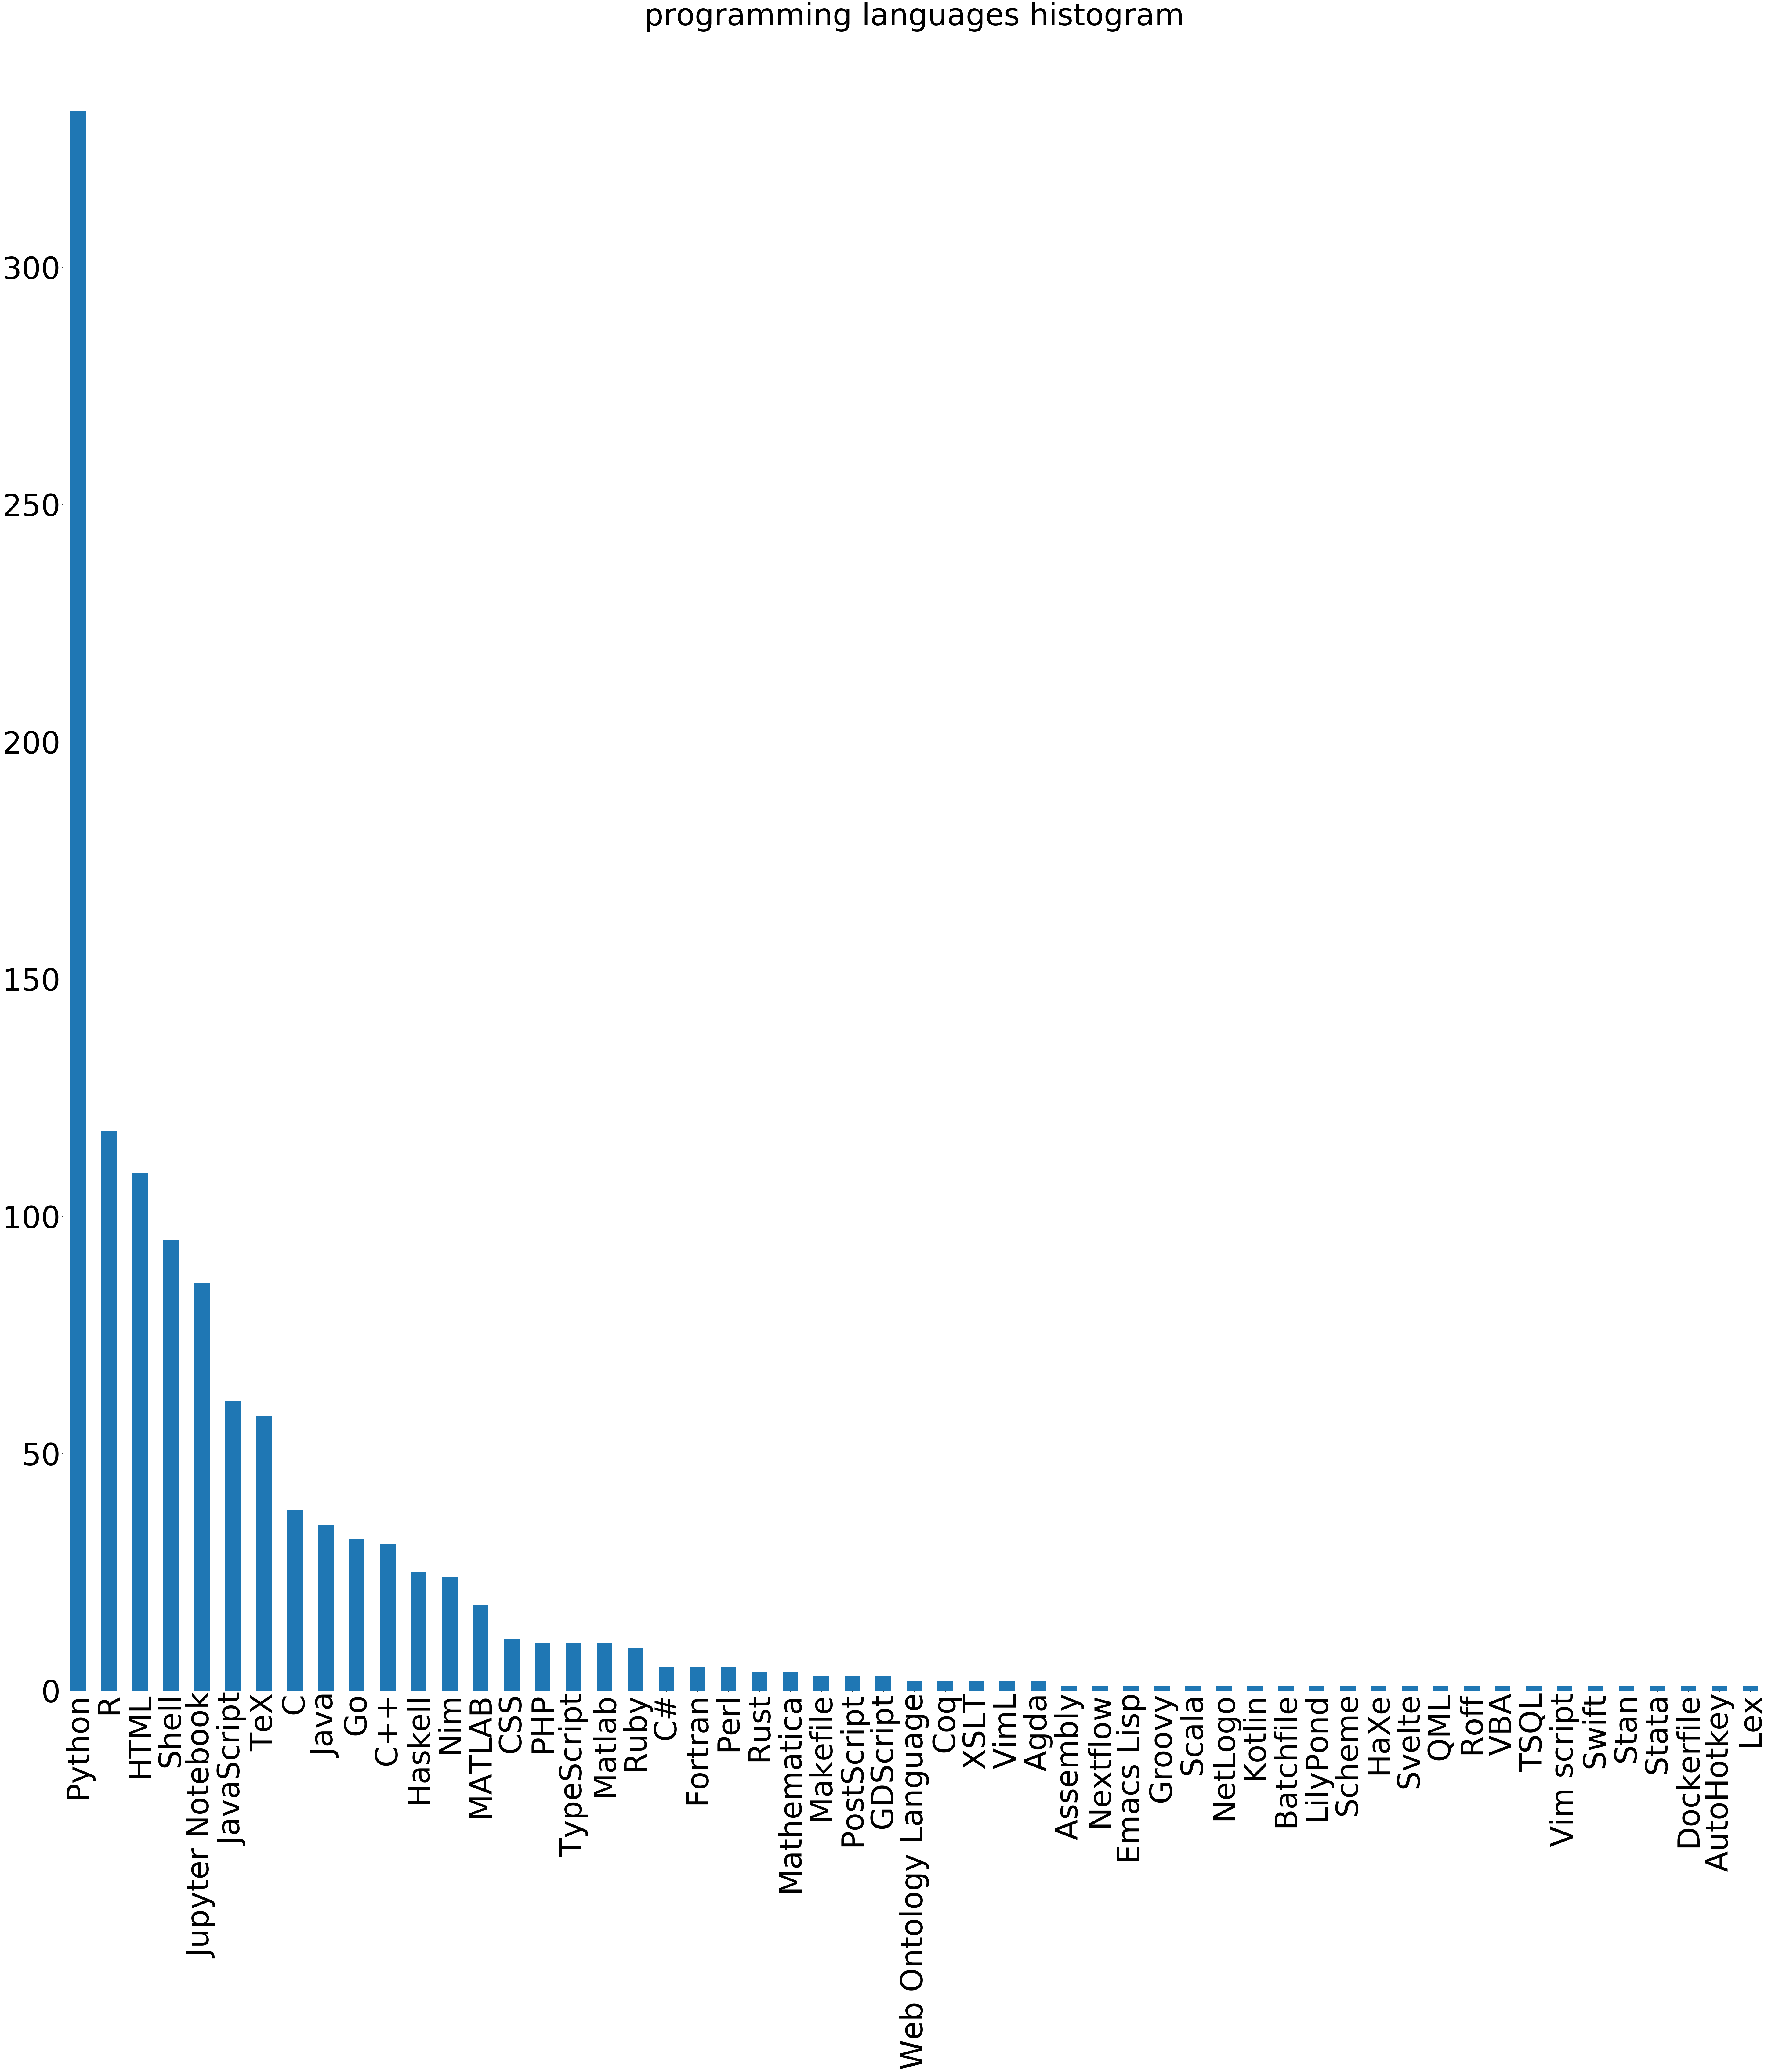

In [38]:
repos["language"].value_counts().plot(kind='bar', figsize = (100,100), fontsize = 100)
plt.title("programming languages histogram", fontsize = 100)
plt.savefig(export_path_graphs + '/language_plot.png')

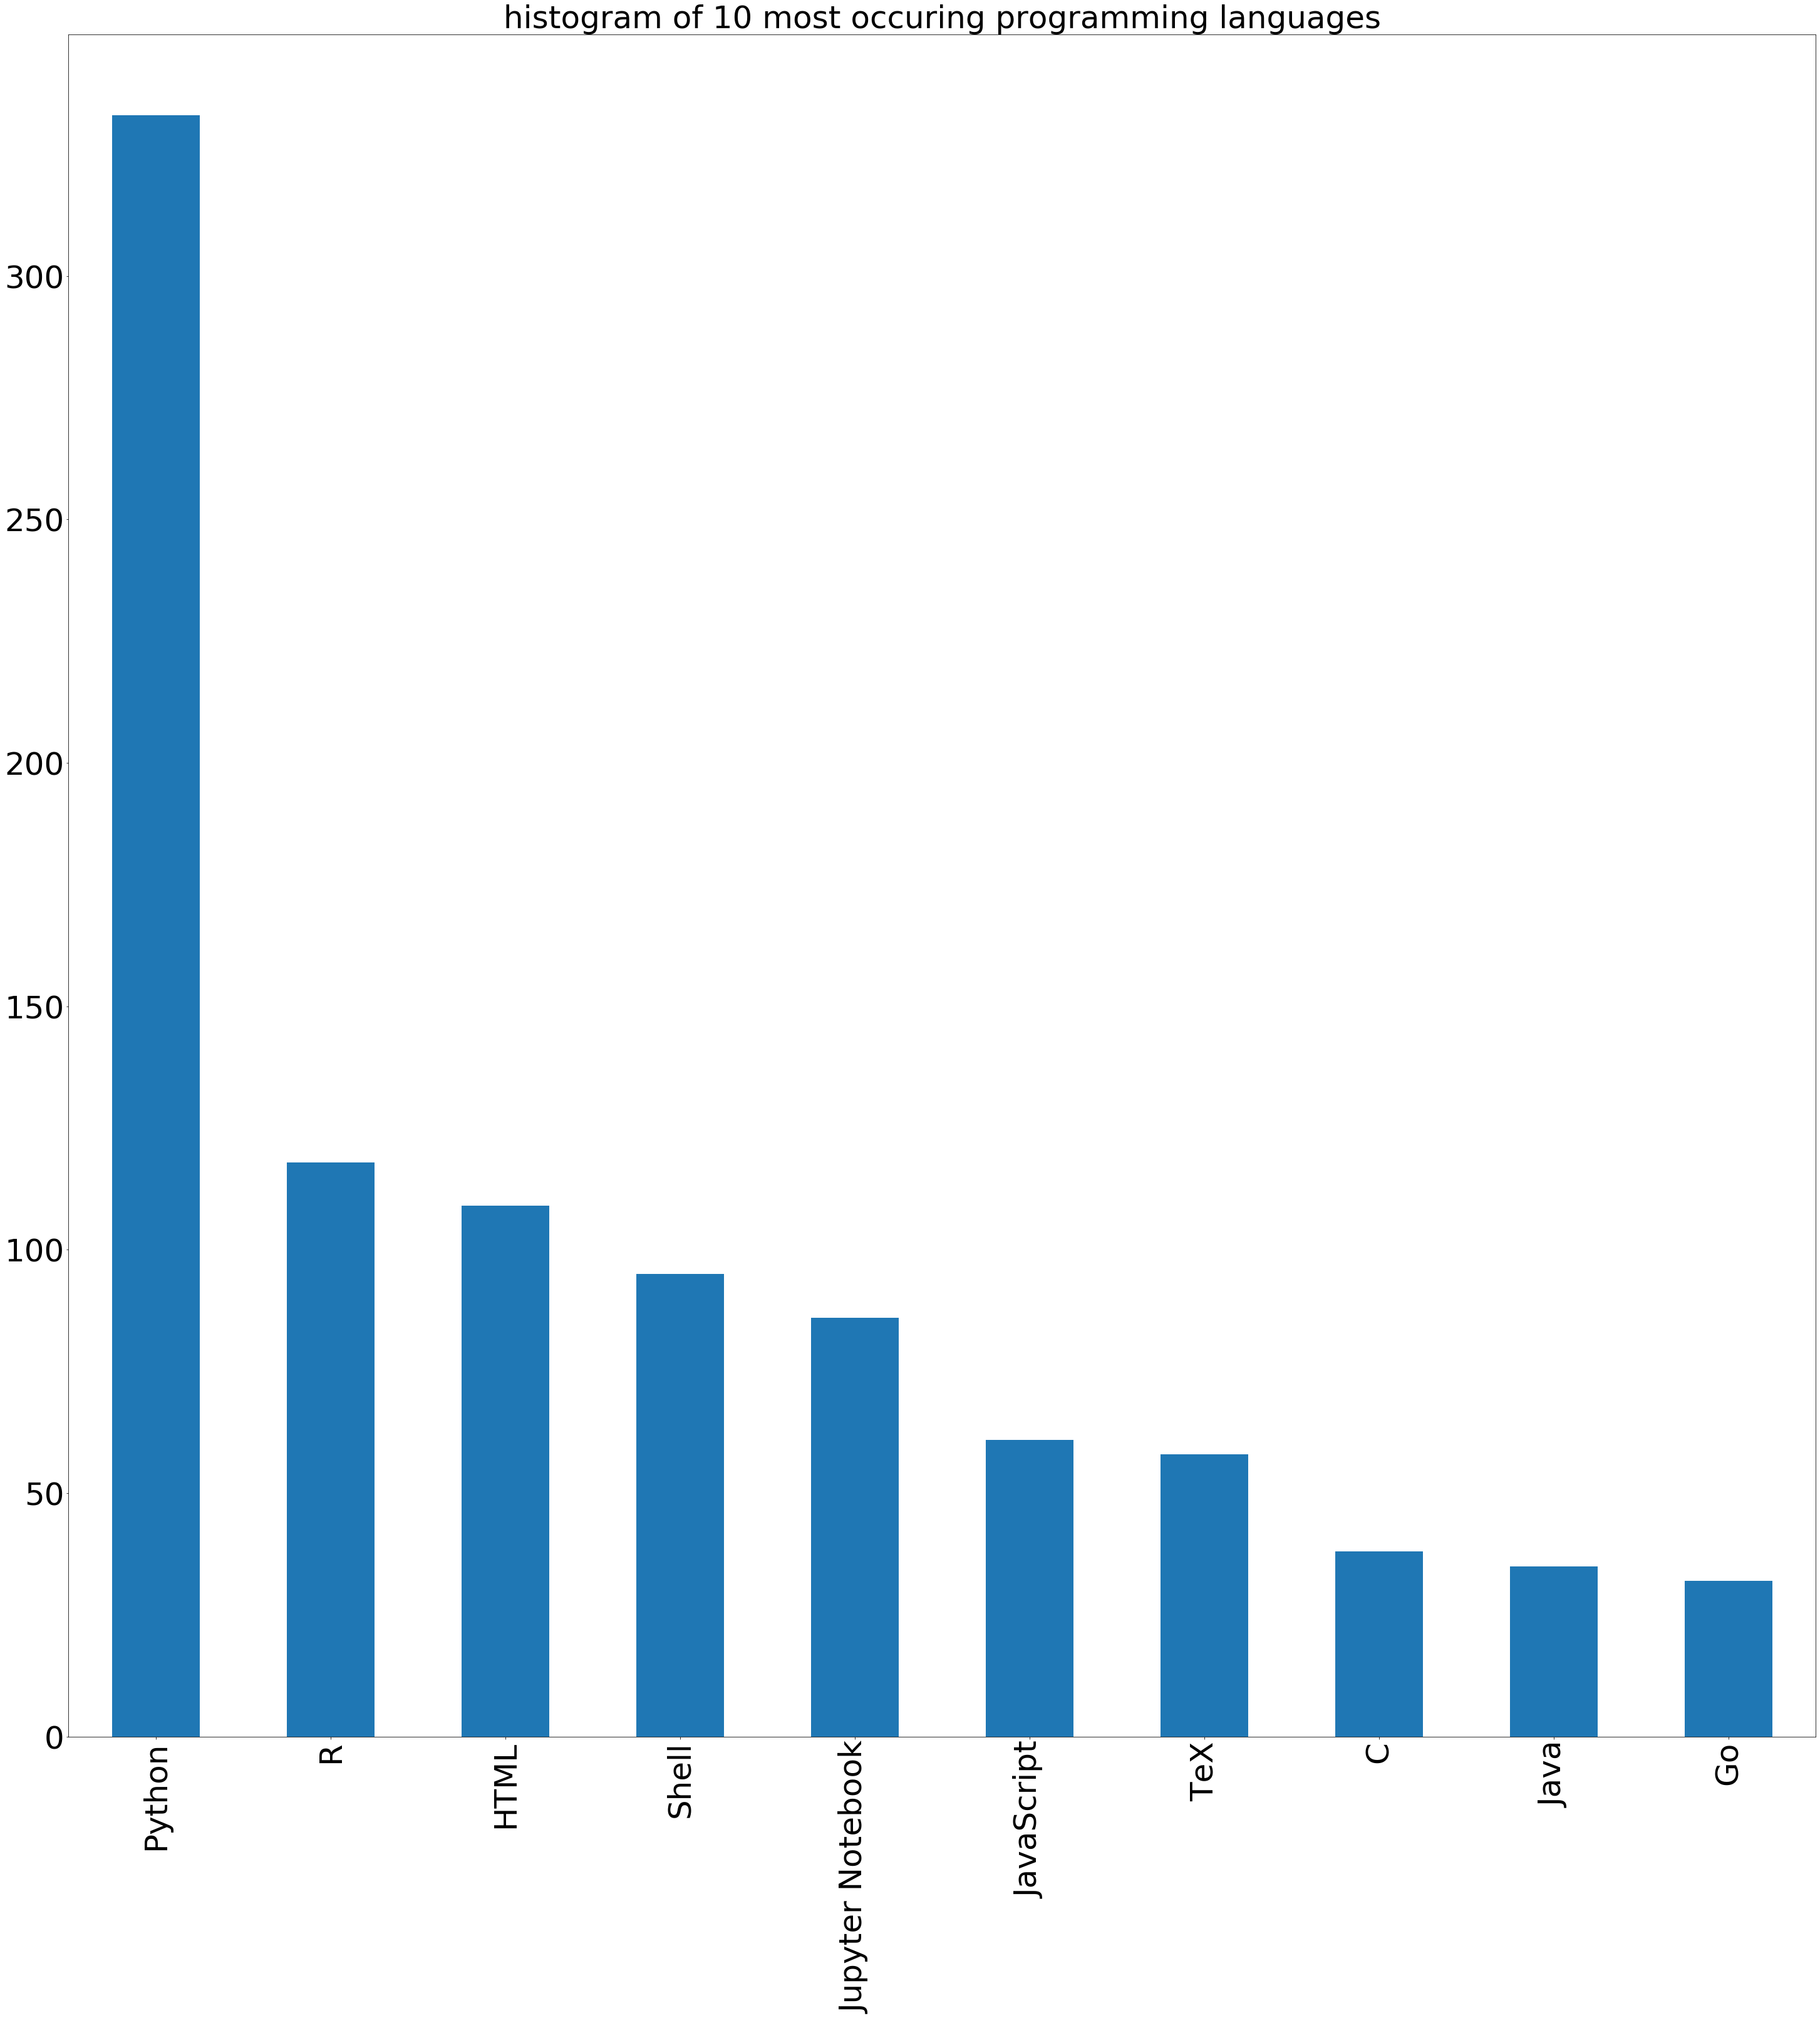

In [39]:
repos["language"].value_counts().head(10).plot(kind='bar', figsize = (50,50), fontsize = 50)
plt.title("histogram of 10 most occuring programming languages", fontsize = 50)
plt.savefig(export_path_graphs + '/language_plot.png')

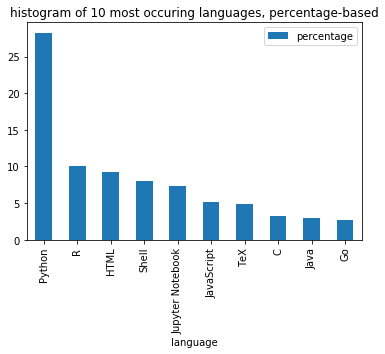

In [139]:
value_count_licenses  = repos["language"].value_counts().head(10)
percentage_count_licences = [[language, value_count/repos["language"].value_counts().sum()*100] for value_count,language in zip(value_count_licenses,value_count_licenses.keys())]
percentage_pd = pd.DataFrame(percentage_count_licences, columns = ['language','percentage'])
percentage_pd  = percentage_pd.set_index('language')
percentage_pd.plot(kind='bar', title='histogram of 10 most occuring languages, percentage-based')
plt.savefig(export_path_graphs + "languages_percentages.png" ,bbox_inches="tight")


## relative occurence languages

In [41]:
sum_five = 0
times = 0
for key,i in zip(repos["language"].value_counts().keys(), repos["language"].value_counts()):
    print(key)
    print(i/sum(repos["language"].value_counts()))
    sum_five += i/sum(repos["language"].value_counts())
    times += 1
    if times ==10:
        break
    
    
print(sum_five)

Python
0.2826825127334465
R
0.100169779286927
HTML
0.09252971137521222
Shell
0.08064516129032258
Jupyter Notebook
0.0730050933786078
JavaScript
0.05178268251273345
TeX
0.04923599320882852
C
0.03225806451612903
Java
0.029711375212224108
Go
0.027164685908319185
0.8191850594227504


## The following percentages represent the percentage of repositories that contains that specific language for the 10 most occuring languages:

In [157]:
for value, language in zip(languages["language"].value_counts().head(10), languages["language"].value_counts().head(10).keys()):
    percentage = value / len(repos) * 100
    print("{} is present in {:.2f} % of all repositories". format(language, percentage))

Python is present in 37.02 % of all repositories
Shell is present in 23.82 % of all repositories
HTML is present in 18.22 % of all repositories
R is present in 16.08 % of all repositories
JavaScript is present in 10.99 % of all repositories
CSS is present in 9.88 % of all repositories
TeX is present in 9.44 % of all repositories
Jupyter Notebook is present in 8.55 % of all repositories
Makefile is present in 7.74 % of all repositories
C++ is present in 6.86 % of all repositories


## correlation table top 10 languages

In [252]:
languages["language"].value_counts().head(10).keys()
dict_languages_user = Counter()
for language in languages["language"].value_counts().head(10).keys():
    dict_top_languages[language] = 0

In [253]:
dict_users = {}

In [254]:

for html_url in repos['html_url']: 
    #print(html_url)
    rows_language_for_one_user = languages.loc[languages['html_url_repository'] == html_url]
    dict_languages_user = Counter()
    for language in languages["language"].value_counts().head(10).keys(): #set all values of languages that need to be present to create a dataset in a later stage to zero
        dict_languages_user[language] = 0
    for language in rows_language_for_one_user['language']:
        if language in dict_languages_user: #only count languages in the top 10
            dict_languages_user[language] += 1
    dict_users[html_url] = dict_languages_user #each user has a dict with 10 booleans representing whether the top 10 language is present in their repo or not


In [255]:
languages_per_repo = pd.DataFrame.from_dict(dict_users, orient = 'index')

In [257]:
languages_per_repo.corr().round(decimals = 2)

,Python,Shell,HTML,R,JavaScript,CSS,TeX,Jupyter Notebook,Makefile,C++
Python,1.00,0.18,-0.04,-0.15,-0.03,0.01,-0.10,0.13,0.13,0.09
Shell,0.18,1.00,-0.00,-0.05,-0.00,0.05,-0.01,-0.01,0.18,0.18
HTML,-0.04,-0.00,1.00,0.18,0.52,0.56,0.17,-0.00,0.06,0.01
R,-0.15,-0.05,0.18,1.00,-0.04,0.06,0.23,-0.03,0.02,0.01
JavaScript,-0.03,-0.00,0.52,-0.04,1.00,0.63,-0.00,-0.07,0.01,0.01
CSS,0.01,0.05,0.56,0.06,0.63,1.00,0.15,-0.04,0.03,-0.01
TeX,-0.10,-0.01,0.17,0.23,-0.00,0.15,1.00,0.04,0.17,0.03
Jupyter Notebook,0.13,-0.01,-0.00,-0.03,-0.07,-0.04,0.04,1.00,0.02,-0.05
Makefile,0.13,0.18,0.06,0.02,0.01,0.03,0.17,0.02,1.00,0.43
C++,0.09,0.18,0.01,0.01,0.01,-0.01,0.03,-0.05,0.43,1.00


## Topics

Topics describe the context of the repository. 

In [42]:
topics['topic'].value_counts().nlargest(50)

genomics                      26
utrecht-university            20
python                        19
yoda                          16
bioinformatics                15
stan                          15
irods                         11
nim-lang                      11
php                           10
james-server                  10
r                              9
r-package                      9
codeigniter                    8
machine-learning               8
growth-curves                  8
bayesian                       8
nim                            8
fiji-plugin                    7
growth-charts                  7
anthropometry                  6
bayesian-data-analysis         6
asreview                       6
high-throughput-sequencing     5
mice                           5
dataset                        5
imagej                         5
mcmc                           5
dutch                          5
golang                         5
nodejs                         5
plotting  

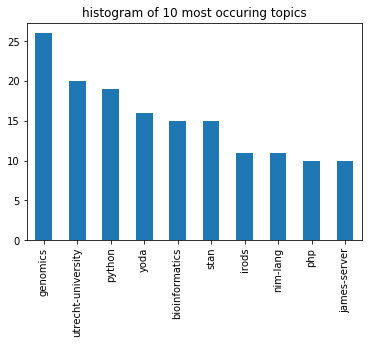

In [43]:
topics['topic'].value_counts().nlargest(10).plot(kind = 'bar', title = 'histogram of 10 most occuring topics')
plt.savefig(export_path_graphs + '/10_most_occuring_topics.png')

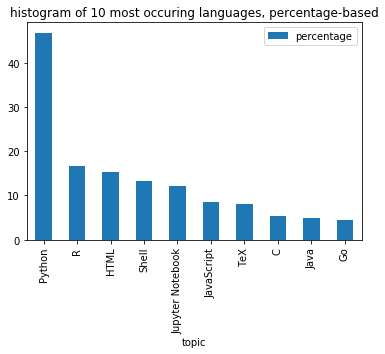

In [138]:
value_count_topics  = topics['topic'].value_counts().nlargest(10)
percentage_count_topics = [[topic, value_count/value_count_topics.sum()*100] for value_count,topic in zip(value_count_topics,value_count_topics.keys())]
percentage_pd = pd.DataFrame(percentage_count_licences, columns = ['topic','percentage'])
percentage_pd  = percentage_pd.set_index('topic')
percentage_pd.plot(kind='bar', title='histogram of 10 most occuring languages, percentage-based')
plt.savefig(export_path_graphs + "languages_percentages.png" ,bbox_inches="tight")


## Repositories mentioning Open Science

Because this project is related to open science, we wanted to investigate how many repositories mentoin open science in their description

In [250]:
open_count = 0
for description in repos["description"]:
    if "open" in str(description).lower():
        #print(description)
        open_count +=1
print("{} repositories contain the word 'open', often related to either open data or open source projects".format(open_count))

17 repositories contain the word 'open', often related to either open data or open source projects


## number of  contributors

The number of contributors gives information on how many people put effort into the repository. Theoratically, it would make sense if a higher amount of contributors implied a more FAIR repository, because those are easier to find in a registery and work on because of their license. 


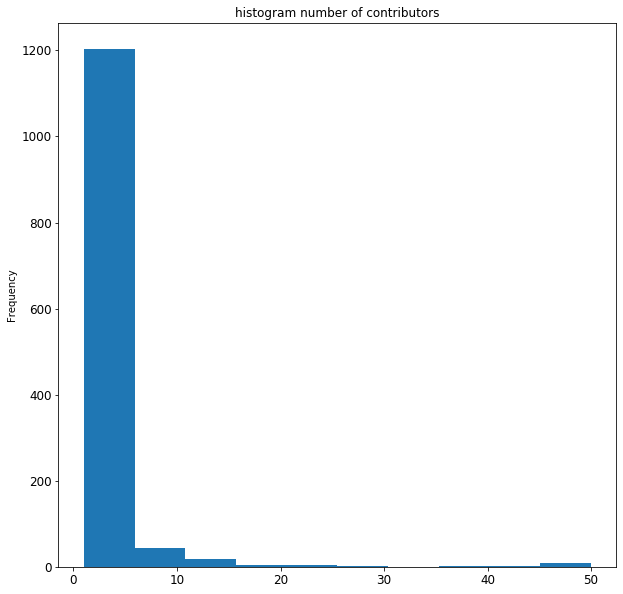

In [44]:
contributors['html_url_repository'].value_counts().plot(kind = 'hist' ,x = 'contributors', figsize = (10,10), fontsize = 12, title = 'histogram number of contributors')
plt.savefig(export_path_graphs + '/contributors.png')


In [45]:
contributors['html_url_repository'].value_counts().nlargest(20, keep = 'all')


https://github.com/stan-dev/math                              50
https://github.com/stan-dev/example-models                    50
https://github.com/stan-dev/rstan                             50
https://github.com/stan-dev/monostan                          50
https://github.com/aldertzomer/Microbial-Genomics-2020        50
https://github.com/aldertzomer/Microbial-Genomics-2019        50
https://github.com/stan-dev/stan                              50
https://github.com/stan-dev/docs                              47
https://github.com/leonardovida/gatsby-starter-netlify-cms    43
https://github.com/stan-dev/pystan2                           39
https://github.com/OceanParcels/parcels                       37
https://github.com/stan-dev/cmdstan                           29
https://github.com/stan-dev/cmdstanpy                         29
https://github.com/brentp/cyvcf2                              26
https://github.com/stan-dev/rstanarm                          24
https://github.com/stan-d

In [46]:
print('mean contributors: {:.2f}'.format(statistics.mean(contributors['html_url_repository'].value_counts())))
print('median contributors: {}'.format(statistics.median(contributors['html_url_repository'].value_counts())))

mean contributors: 2.43
median contributors: 1


## Stargazers

Stargazers represent the amount of people that have 'starred' a Github project. Starring a project can indicate that a user likes the project. It can also be used to bookmark a project, since starred projects are saved. The amount of stargazers can be used as a metric to measure popularity. 

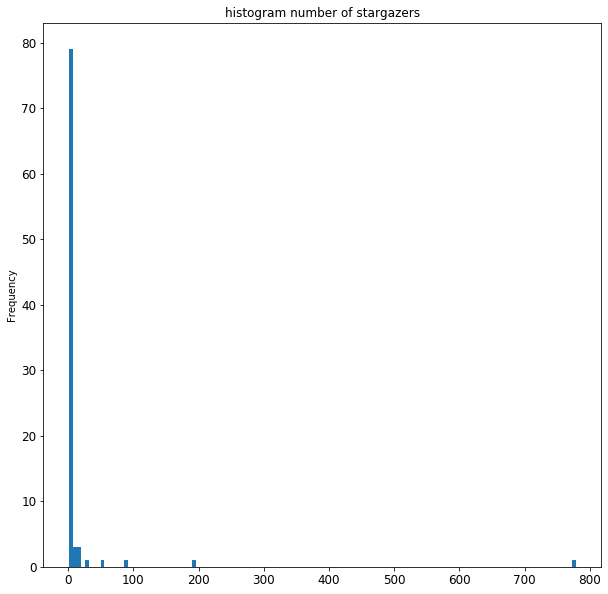

In [47]:
repos['stargazers_count'].value_counts().plot(kind = 'hist' , figsize = (10,10), fontsize = 12, title = 'histogram number of stargazers', bins = 128)
plt.savefig(export_path_graphs + '/stargazers.png')


In [48]:
repos.nlargest(10, 'stargazers_count')

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,permissions,score,is_research_group
941,8043756,MDEwOlJlcG9zaXRvcnk4MDQzNzU2,stan,stan-dev/stan,False,stan-dev,https://github.com/stan-dev/stan,Stan development repository. The master branch...,False,https://api.github.com/repos/stan-dev/stan,...,162,"BSD 3-Clause ""New"" or ""Revised"" License","['bayesian-methods', 'bayesian', 'bayesian-inf...",331,162,2053,develop,NaN,1.0,False
942,10256919,MDEwOlJlcG9zaXRvcnkxMDI1NjkxOQ==,pystan2,stan-dev/pystan2,False,stan-dev,https://github.com/stan-dev/pystan2,"PyStan, the Python interface to Stan",False,https://api.github.com/repos/stan-dev/pystan2,...,0,GNU General Public License v3.0,"['python', 'machine-learning', 'statistics', '...",192,0,915,develop,NaN,1.0,False
943,10229211,MDEwOlJlcG9zaXRvcnkxMDIyOTIxMQ==,rstan,stan-dev/rstan,False,stan-dev,https://github.com/stan-dev/rstan,"RStan, the R interface to Stan",False,https://api.github.com/repos/stan-dev/rstan,...,262,NaN,"['r', 'bayesian-inference', 'stan', 'r-package...",229,262,774,develop,NaN,1.0,False
944,22768481,MDEwOlJlcG9zaXRvcnkyMjc2ODQ4MQ==,example-models,stan-dev/example-models,False,stan-dev,https://github.com/stan-dev/example-models,Example models for Stan,False,https://api.github.com/repos/stan-dev/example-...,...,49,NaN,[],421,49,639,master,NaN,1.0,False
836,196186770,MDEwOlJlcG9zaXRvcnkxOTYxODY3NzA=,lighthouse2,jbikker/lighthouse2,False,jbikker,https://github.com/jbikker/lighthouse2,Lighthouse 2 framework for real-time ray tracing,False,https://api.github.com/repos/jbikker/lighthouse2,...,5,Apache License 2.0,"['gamedev', 'real-time', 'opengl', 'game-engin...",45,5,556,master,NaN,1.0,False
175,44471657,MDEwOlJlcG9zaXRvcnk0NDQ3MTY1Nw==,recordlinkage,J535D165/recordlinkage,False,J535D165,https://github.com/J535D165/recordlinkage,A toolkit for record linkage and duplicate det...,False,https://api.github.com/repos/J535D165/recordli...,...,46,"BSD 3-Clause ""New"" or ""Revised"" License","['python', 'machine-learning', 'privacy', 'ded...",92,46,546,master,NaN,1.0,False
945,38388440,MDEwOlJlcG9zaXRvcnkzODM4ODQ0MA==,math,stan-dev/math,False,stan-dev,https://github.com/stan-dev/math,The Stan Math Library is a C++ template librar...,False,https://api.github.com/repos/stan-dev/math,...,240,"BSD 3-Clause ""New"" or ""Revised"" License","['math', 'cpp', 'boost', 'automatic-differenti...",148,240,507,develop,NaN,1.0,False
452,101316174,MDEwOlJlcG9zaXRvcnkxMDEzMTYxNzQ=,mosdepth,brentp/mosdepth,False,brentp,https://github.com/brentp/mosdepth,"fast BAM/CRAM depth calculation for WGS, exome...",False,https://api.github.com/repos/brentp/mosdepth,...,26,MIT License,"['coverage', 'nim', 'genome', 'sequencing', 'd...",68,26,385,master,NaN,1.0,False
946,11455249,MDEwOlJlcG9zaXRvcnkxMTQ1NTI0OQ==,rstanarm,stan-dev/rstanarm,False,stan-dev,https://github.com/stan-dev/rstanarm,rstanarm R package for Bayesian applied regres...,False,https://api.github.com/repos/stan-dev/rstanarm,...,124,GNU General Public License v3.0,"['r', 'bayesian-methods', 'rstan', 'bayesian',...",101,124,289,master,NaN,1.0,False
947,59324359,MDEwOlJlcG9zaXRvcnk1OTMyNDM1OQ==,bayesplot,stan-dev/bayesplot,False,stan-dev,https://github.com/stan-dev/bayesplot,bayesplot R package for plotting Bayesian models,False,https://api.github.com/repos/stan-dev/bayesplot,...,59,GNU General Public License v3.0,"['visualization', 'ggplot2', 'pandoc', 'bayesi...",67,59,284,master,NaN,1.0,False


## Watchers

Watchers receive  notifications about project activity.

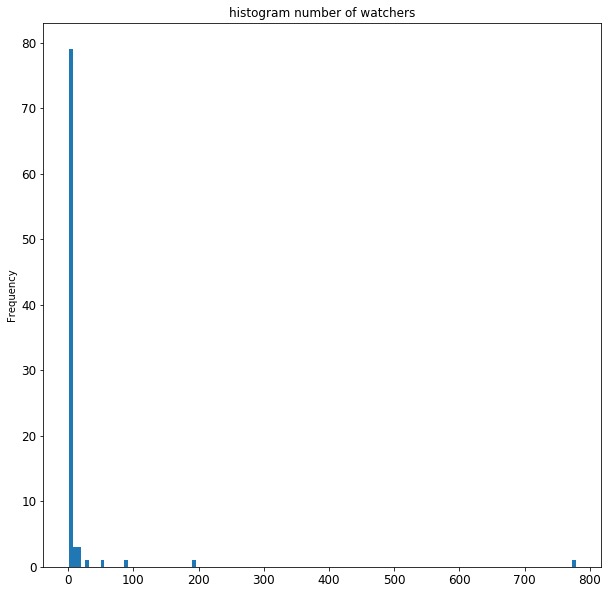

In [49]:
repos['watchers_count'].value_counts().plot(kind = 'hist' , figsize = (10,10), fontsize = 12, title = 'histogram number of watchers', bins = 128)
plt.savefig(export_path_graphs + '/watchers.png')


In [50]:
repos.nlargest(10, 'watchers_count')

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,permissions,score,is_research_group
941,8043756,MDEwOlJlcG9zaXRvcnk4MDQzNzU2,stan,stan-dev/stan,False,stan-dev,https://github.com/stan-dev/stan,Stan development repository. The master branch...,False,https://api.github.com/repos/stan-dev/stan,...,162,"BSD 3-Clause ""New"" or ""Revised"" License","['bayesian-methods', 'bayesian', 'bayesian-inf...",331,162,2053,develop,NaN,1.0,False
942,10256919,MDEwOlJlcG9zaXRvcnkxMDI1NjkxOQ==,pystan2,stan-dev/pystan2,False,stan-dev,https://github.com/stan-dev/pystan2,"PyStan, the Python interface to Stan",False,https://api.github.com/repos/stan-dev/pystan2,...,0,GNU General Public License v3.0,"['python', 'machine-learning', 'statistics', '...",192,0,915,develop,NaN,1.0,False
943,10229211,MDEwOlJlcG9zaXRvcnkxMDIyOTIxMQ==,rstan,stan-dev/rstan,False,stan-dev,https://github.com/stan-dev/rstan,"RStan, the R interface to Stan",False,https://api.github.com/repos/stan-dev/rstan,...,262,NaN,"['r', 'bayesian-inference', 'stan', 'r-package...",229,262,774,develop,NaN,1.0,False
944,22768481,MDEwOlJlcG9zaXRvcnkyMjc2ODQ4MQ==,example-models,stan-dev/example-models,False,stan-dev,https://github.com/stan-dev/example-models,Example models for Stan,False,https://api.github.com/repos/stan-dev/example-...,...,49,NaN,[],421,49,639,master,NaN,1.0,False
836,196186770,MDEwOlJlcG9zaXRvcnkxOTYxODY3NzA=,lighthouse2,jbikker/lighthouse2,False,jbikker,https://github.com/jbikker/lighthouse2,Lighthouse 2 framework for real-time ray tracing,False,https://api.github.com/repos/jbikker/lighthouse2,...,5,Apache License 2.0,"['gamedev', 'real-time', 'opengl', 'game-engin...",45,5,556,master,NaN,1.0,False
175,44471657,MDEwOlJlcG9zaXRvcnk0NDQ3MTY1Nw==,recordlinkage,J535D165/recordlinkage,False,J535D165,https://github.com/J535D165/recordlinkage,A toolkit for record linkage and duplicate det...,False,https://api.github.com/repos/J535D165/recordli...,...,46,"BSD 3-Clause ""New"" or ""Revised"" License","['python', 'machine-learning', 'privacy', 'ded...",92,46,546,master,NaN,1.0,False
945,38388440,MDEwOlJlcG9zaXRvcnkzODM4ODQ0MA==,math,stan-dev/math,False,stan-dev,https://github.com/stan-dev/math,The Stan Math Library is a C++ template librar...,False,https://api.github.com/repos/stan-dev/math,...,240,"BSD 3-Clause ""New"" or ""Revised"" License","['math', 'cpp', 'boost', 'automatic-differenti...",148,240,507,develop,NaN,1.0,False
452,101316174,MDEwOlJlcG9zaXRvcnkxMDEzMTYxNzQ=,mosdepth,brentp/mosdepth,False,brentp,https://github.com/brentp/mosdepth,"fast BAM/CRAM depth calculation for WGS, exome...",False,https://api.github.com/repos/brentp/mosdepth,...,26,MIT License,"['coverage', 'nim', 'genome', 'sequencing', 'd...",68,26,385,master,NaN,1.0,False
946,11455249,MDEwOlJlcG9zaXRvcnkxMTQ1NTI0OQ==,rstanarm,stan-dev/rstanarm,False,stan-dev,https://github.com/stan-dev/rstanarm,rstanarm R package for Bayesian applied regres...,False,https://api.github.com/repos/stan-dev/rstanarm,...,124,GNU General Public License v3.0,"['r', 'bayesian-methods', 'rstan', 'bayesian',...",101,124,289,master,NaN,1.0,False
947,59324359,MDEwOlJlcG9zaXRvcnk1OTMyNDM1OQ==,bayesplot,stan-dev/bayesplot,False,stan-dev,https://github.com/stan-dev/bayesplot,bayesplot R package for plotting Bayesian models,False,https://api.github.com/repos/stan-dev/bayesplot,...,59,GNU General Public License v3.0,"['visualization', 'ggplot2', 'pandoc', 'bayesi...",67,59,284,master,NaN,1.0,False


## Has issues

Boolean stating whether a repository allows users to address issues. An issue is way to keep track of the tasks, enchantments and bugs of the project. They can be discussed in a thread by users and developers. Each repository can enable their own issue page. An issue can be open, for example when a new bug is found, or closed, when it is solved. 

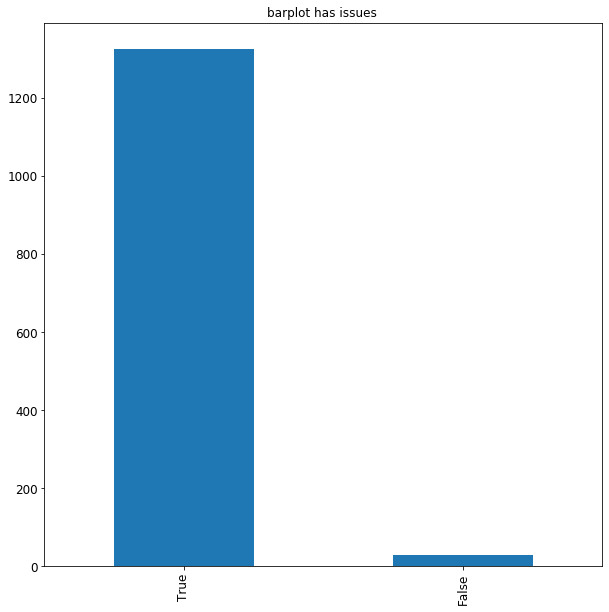

In [51]:
repos['has_issues'].value_counts().plot(kind = 'bar' , figsize = (10,10), fontsize = 12, title = 'barplot has issues ')
plt.savefig(export_path_graphs + '/has_issues.png')

## Open issues

The amount of open issues a repository has

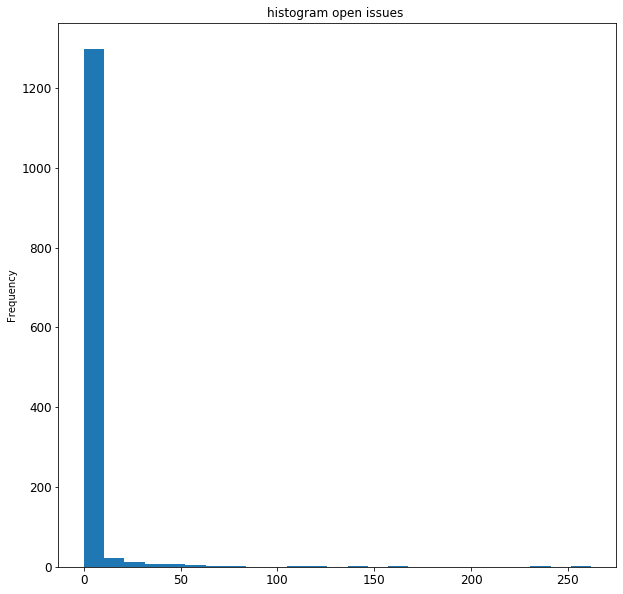

In [52]:
repos['open_issues'].plot(kind = 'hist' , figsize = (10,10), fontsize = 12, title = 'histogram open issues ', bins = 25)
plt.savefig(export_path_graphs + '/open_issues.png')

## Fork count

A fork is a copy of a repository for another user.

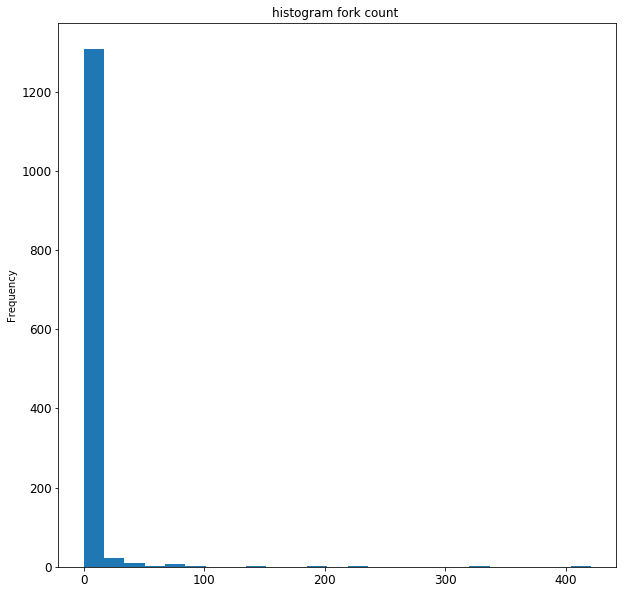

In [53]:
repos['forks'].plot(kind = 'hist' , figsize = (10,10), fontsize = 12, title = 'histogram fork count ', bins = 25)
plt.savefig(export_path_graphs + '/fork_count.png')

## default branch

The default branch is the standard branch of a repository.

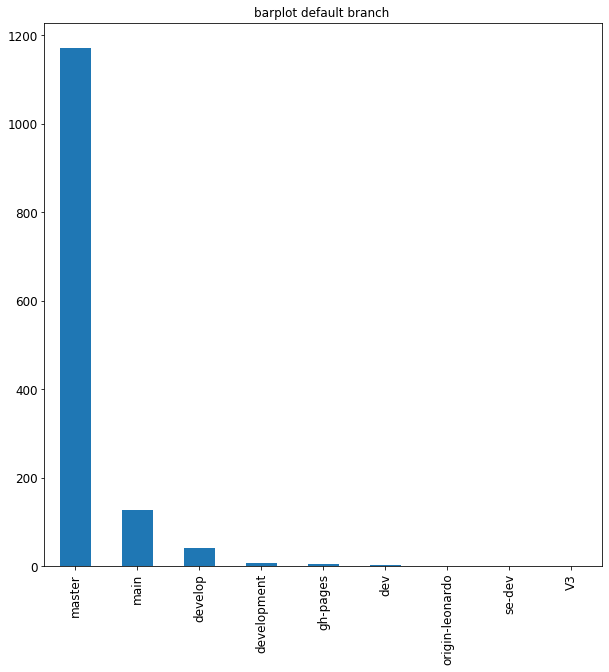

In [54]:
repos['default_branch'].value_counts().plot(kind = 'bar' , figsize = (10,10), fontsize = 12, title = 'barplot default branch ')
plt.savefig(export_path_graphs + '/default_branch.png')

## Homepage

The homepage is often the personal website of the research group or user. 

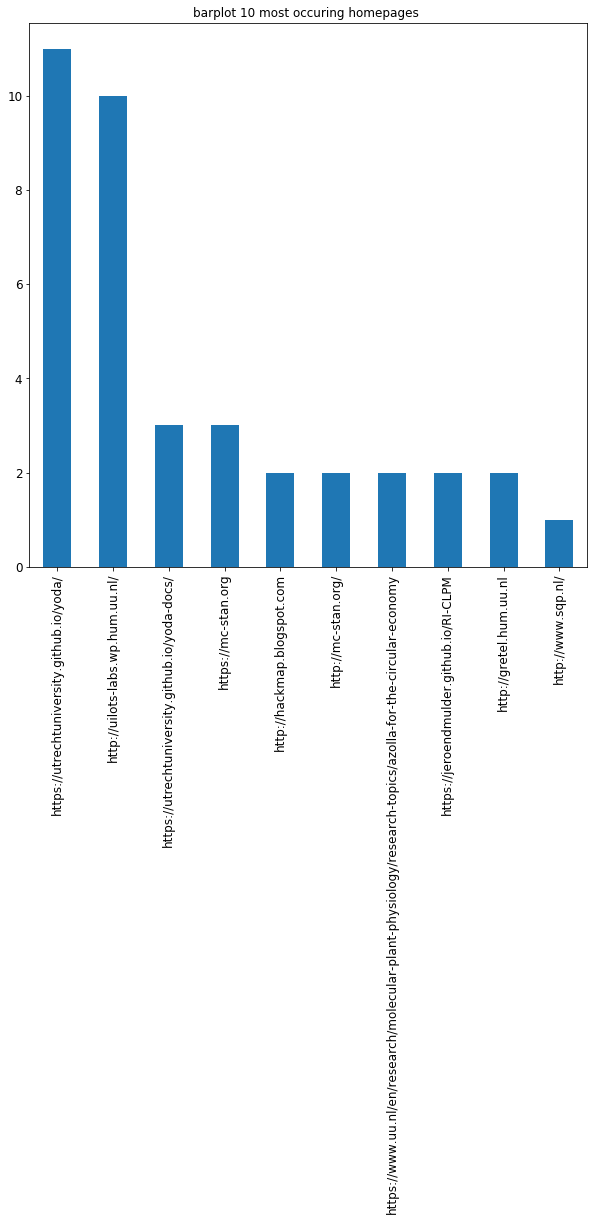

In [55]:
repos['homepage'].value_counts().nlargest(10).plot(kind = 'bar' , figsize = (10,10), fontsize = 12, title = 'barplot 10 most occuring homepages ')
plt.savefig(export_path_graphs + '/homepage_10_most_occuring.png')

## most recent commits 

If a repository is really active, we expect them to be more FAIR. As stated, a higher FAIR score implies a repository that is easier to find and work with.

In [58]:
months_ago_most_recent_commit =[]
today = str(date.today())
split_today = today.split('-')
for date_item in repos['updated_at']:
    split_date = date_item.split('-')
    years_ago = int(split_today[0]) - int(split_date[0])
    months_ago = 12 * years_ago + (int(split_today[1]) - int(split_date[1]))
    months_ago_most_recent_commit.append(months_ago)
repos['months_ago_most_recent_commit'] = months_ago_most_recent_commit

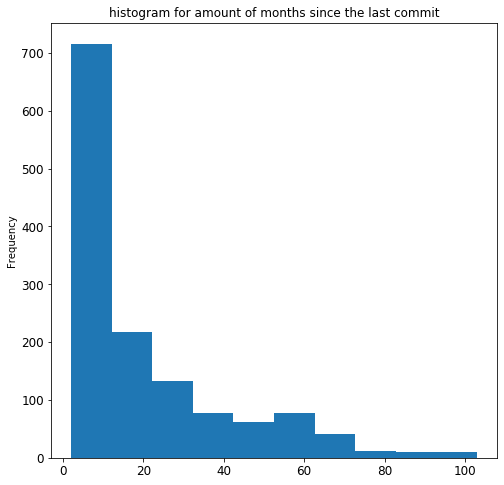

In [59]:
repos['months_ago_most_recent_commit'].plot(kind = 'hist', figsize = (8,8), fontsize = 12, title = 'histogram for amount of months since the last commit') #Add x-axis months ago
plt.savefig(export_path_graphs + '/most_recent_commit_months.png')

In [60]:
print('mean contributors: {:.1f}'.format(statistics.mean(repos['months_ago_most_recent_commit'])))
print('median contributors: {}'.format(statistics.median(repos['months_ago_most_recent_commit'])))


mean contributors: 19.8
median contributors: 11.0


## Howfairis sum score descriptives and correlations

In this section, the median and meand of the howfairis sum score is shown, as well as correlations the how fair is sum score, the amount of contributors and the amount of months since the last commit

In [61]:
how_fair_sum_scores = []
for index, row in how_fair_is.iterrows():
    how_fair_is_sum = row['howfairis_repository'] + row['howfairis_license'] +row['howfairis_registry'] + row['howfairis_citation'] + row['howfairis_checklist']
    how_fair_sum_scores.append(how_fair_is_sum)

mean: 1.60
median: 2.0


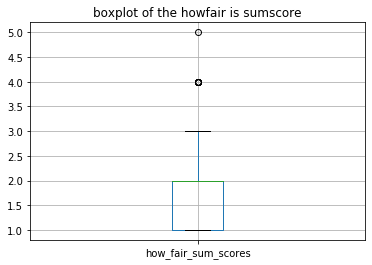

In [62]:
how_fair_is['how_fair_sum_scores'] = how_fair_sum_scores
print("mean: {:.2f}".format(statistics.mean(how_fair_sum_scores)))
print("median: {}".format(statistics.median(how_fair_sum_scores)))
pd.DataFrame((statistics.mean(how_fair_sum_scores), statistics.median(how_fair_sum_scores)),["mean", "median"])
how_fair_is.boxplot(column = 'how_fair_sum_scores')
plt.title('boxplot of the howfair is sumscore')
plt.savefig(export_path_graphs + '/howfairissum_boxplot.png')


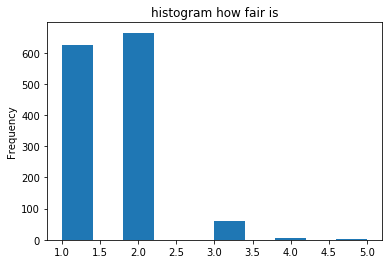

In [63]:
how_fair_is['how_fair_sum_scores'].plot(kind = 'hist', title = 'histogram how fair is')
plt.savefig(export_path_graphs + '/howfairissum_histogram.png')


In [64]:
correlation_df = pd.DataFrame()

In [65]:
correlation_df['how_fair_sum_scores'] = how_fair_sum_scores
correlation_df['contributions']= contributors['contributions']
correlation_df['months_ago_most_recent_commit'] = repos['months_ago_most_recent_commit']

In [66]:
correlation_df.corr(method='pearson').round(decimals=2)

,how_fair_sum_scores,contributions,months_ago_most_recent_commit
how_fair_sum_scores,1.00,0.00,-0.23
contributions,0.00,1.00,-0.01
months_ago_most_recent_commit,-0.23,-0.01,1.00


## Binary correlation plot between howfairis variables

A correlation table that shows the correlation between the howfairis measures.

In [67]:
correlation_how_fair_is = pd.DataFrame()

#correlation_how_fair_is['howfairis_repository'] = how_fair_is['howfairis_repository']
correlation_how_fair_is['howfairis_license'] = how_fair_is['howfairis_license']
correlation_how_fair_is['howfairis_registry'] = how_fair_is['howfairis_registry']
correlation_how_fair_is['howfairis_citation'] = how_fair_is['howfairis_citation']
correlation_how_fair_is['howfairis_checklist'] = how_fair_is['howfairis_checklist']



In [68]:
correlation_how_fair_is.corr(method='pearson').round(decimals=2) #howfairis_repository is all true, so has no variance

,howfairis_license,howfairis_registry,howfairis_citation,howfairis_checklist
howfairis_license,1.00,0.09,0.10,0.05
howfairis_registry,0.09,1.00,0.08,0.24
howfairis_citation,0.10,0.08,1.00,0.13
howfairis_checklist,0.05,0.24,0.13,1.00


## Programming language and Howfairis

Different programming languages need different licences. For some languages (e.g. python), these are more complex. How does this influence the HowFairis score?

In [69]:
languages['language'].value_counts().nlargest(10)

Python              502
Shell               323
HTML                247
R                   218
JavaScript          149
CSS                 134
TeX                 128
Jupyter Notebook    116
Makefile            105
C++                  93
Name: language, dtype: int64

In [70]:
index_how_fair_is = 0
language_how_fair_is_df = []
#get a list with the how-fair-is scores added to the language dataset
for index,row in languages.iterrows():
    if how_fair_is['html_url'][index_how_fair_is] != languages['html_url_repository'][index]:
        index_how_fair_is += 1 
    sum_score = how_fair_is['how_fair_sum_scores'][index_how_fair_is]
    language_how_fair_is_df.append(sum_score)
regression_data_how_fair_is_language = pd.DataFrame()
language_data_dummies = pd.get_dummies(languages['language'])  #one hot-encoding for language dataset
regression_data_how_fair_is_language['how_fair_is_sum'] = language_how_fair_is_df
languages['how_fair_sum_scores'] = regression_data_how_fair_is_language #add scores to language dataset

In [71]:
train_size = int(len(languages) * 0.8) #training size is 2227, testing size is  557
regression_how_fair_is_language_train_X = language_data_dummies[:train_size]
regression_how_fair_is_language_train_y = regression_data_how_fair_is_language['how_fair_is_sum'][:train_size]
regression_how_fair_is_language_test_X = language_data_dummies[train_size:]
regression_how_fair_is_language_test_y = regression_data_how_fair_is_language['how_fair_is_sum'][train_size:]

In [72]:
#train regression
regression_language_how_fair_is = LinearRegression()
regression_language_how_fair_is.fit(regression_how_fair_is_language_train_X, regression_how_fair_is_language_train_y)

# Make predictions using the testing set
language_how_fair_is_y_pred = regression_language_how_fair_is.predict(regression_how_fair_is_language_test_X)

# The coefficients
#print('Coefficients: \n', regression_language_how_fair_is.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))


Mean squared error: 1377381701137258329931776.00
Coefficient of determination: -2929495005183538869829632.00


In [73]:
language_subset = language_data_dummies[['Python', 'Shell', 'R', 'JavaScript', 'HTML']] #top 5 languages


In [74]:
train_size = int(len(language_subset) * 0.8)
regression_how_fair_is_language_train_X = language_subset[:train_size]
regression_how_fair_is_language_train_y = regression_data_how_fair_is_language['how_fair_is_sum'][:train_size]
regression_how_fair_is_language_test_X = language_subset[train_size:]
regression_how_fair_is_language_test_y = regression_data_how_fair_is_language['how_fair_is_sum'][train_size:]

In [75]:
#train regression
regression_language_how_fair_is = LinearRegression()
regression_language_how_fair_is.fit(regression_how_fair_is_language_train_X, regression_how_fair_is_language_train_y)

# Make predictions using the testing set
language_how_fair_is_y_pred = regression_language_how_fair_is.predict(regression_how_fair_is_language_test_X)

# The coefficients
print('Coefficients: \n', regression_language_how_fair_is.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))


Coefficients: 
 [-0.00806049  0.04545234 -0.01923682 -0.04352009 -0.0493532 ]
Mean squared error: 0.47
Coefficient of determination: 0.00


A simple regression for predicting the how fair is score from  all or a subset of languages does not seem to yield any results 

## Examples of high howfairis scores 

In this section, some links to the pages that have a high howfairis score are shown. 

In [76]:
how_fair_is_high_scores = how_fair_is[how_fair_is['how_fair_sum_scores'] > 3]

how_fair_is_high_scores['html_url']

15            https://github.com/cjvanlissa/worcs
19             https://github.com/cjvanlissa/bain
175     https://github.com/J535D165/recordlinkage
191          https://github.com/asreview/asreview
239               https://github.com/CLARIAH/grlc
1059        https://github.com/puregome/notebooks
1157      https://github.com/haddocking/pdb-tools
1302      https://github.com/D-score/childdevdata
Name: html_url, dtype: object

## Re-use of other projects and articles

Are there competitors?
How do they relate to each other?